<a href="https://colab.research.google.com/github/limjiin/TIL/blob/main/01_01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ctrl + m + d : 삭제

In [ ]:
# colab 한글깨짐 해결위한 설치
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# matplotlib 설정
from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline

# # mac OS 한글 깨짐 해결
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# colab 한글이 깨짐 해결
from matplotlib import font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

# 런타임 다시 시작해야 한글 깨짐 해결가능!!!!

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 1. Linear Regression

### 1) 가상의 데이터로 예측하기

#### 1-1. 가상의 데이터 생성

`make_regression(n_samples, n_features, bias, noise)`
-  Scikit-Learn의 datasets 서브패키지는 **회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()**을 제공한다.
-  make_regression()으로 만들어진 데이터는 종속변수 y의 값이 독립변수 x 벡터의 선형 조합인 선형관계를 가진다.


주요 parameter:

 - `n_samples` : 표본 데이터의 갯수, (정수, 기본값 = 100)   
 - `n_features` : 독립변수의 수(차원), (정수, 기본값 = 100)  
 - `n_target` : 종속변수의 수, (정수, 기본값 = 1)
 - `bias`: y절편, (실수, 기본값은 0.0)   
 - `noise`: 분포, (기본값은 0.0)
 - `random_state`: 시드 --> 랜덤 샘플 추출시 같은 시드에서는 항상 같은 결과를 도출함


참고: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
# 1000개의 데이터(sample), 1개의 특성(feature)을 가진 랜덤한 데이터 셋을 생성해보자.
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50, random_state = 333) 
data

(array([[-2.24228468e+00],
        [ 3.11545352e-01],
        [-9.59323801e-01],
        [-3.72814623e-01],
        [-4.96853099e-01],
        [-8.44892661e-01],
        [-4.12892515e-01],
        [ 5.68889796e-01],
        [ 3.03685426e-01],
        [-7.13469496e-01],
        [-6.02616380e-01],
        [-1.83064113e+00],
        [-6.11762285e-01],
        [-5.02934981e-01],
        [ 7.31034880e-01],
        [-7.51695213e-01],
        [ 7.71292324e-01],
        [ 3.14802002e-01],
        [-1.72049967e+00],
        [ 1.66162254e-01],
        [ 9.92609808e-01],
        [-9.47193672e-01],
        [ 1.48166272e+00],
        [ 1.07522625e+00],
        [ 3.20012946e-01],
        [-2.06265699e-01],
        [ 1.18502984e+00],
        [ 7.45387372e-02],
        [ 2.14996773e+00],
        [ 2.07855512e+00],
        [ 6.83516104e-01],
        [-4.06891866e-01],
        [-2.36185874e-01],
        [ 1.21897237e+00],
        [-9.03982398e-01],
        [-1.80326339e-01],
        [ 2.17229070e-01],
 

In [ ]:
#data[0] --> X_data, data[1] --> y_data로 할당시켜보자.
X_data = data[0]
y_data = data[1]
X_data, y_data

(array([[-2.24228468e+00],
        [ 3.11545352e-01],
        [-9.59323801e-01],
        [-3.72814623e-01],
        [-4.96853099e-01],
        [-8.44892661e-01],
        [-4.12892515e-01],
        [ 5.68889796e-01],
        [ 3.03685426e-01],
        [-7.13469496e-01],
        [-6.02616380e-01],
        [-1.83064113e+00],
        [-6.11762285e-01],
        [-5.02934981e-01],
        [ 7.31034880e-01],
        [-7.51695213e-01],
        [ 7.71292324e-01],
        [ 3.14802002e-01],
        [-1.72049967e+00],
        [ 1.66162254e-01],
        [ 9.92609808e-01],
        [-9.47193672e-01],
        [ 1.48166272e+00],
        [ 1.07522625e+00],
        [ 3.20012946e-01],
        [-2.06265699e-01],
        [ 1.18502984e+00],
        [ 7.45387372e-02],
        [ 2.14996773e+00],
        [ 2.07855512e+00],
        [ 6.83516104e-01],
        [-4.06891866e-01],
        [-2.36185874e-01],
        [ 1.21897237e+00],
        [-9.03982398e-01],
        [-1.80326339e-01],
        [ 2.17229070e-01],
 

scatter()
* matplotlib의 pyplot 패키지에서는 산점도를 그릴 수 있는 명령어 scatter()을 제공한다. 

참고: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html 


In [ ]:
from matplotlib import pyplot as plt

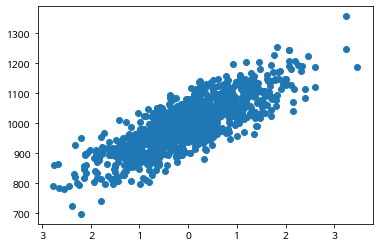

In [ ]:
# 위에서 생성한 가상 데이터 셋을 그래프 위에 그려보자.

%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그래프를 볼 수 있게 하는 기능

plt.scatter(data[0], data[1]) 
plt.show() #그래프 표시

In [ ]:
# 랜덤 데이터 셋을 DataFrame으로 변환시켜보자.
import pandas as pd

# X_data로 데이터프레임 생성
random_df = pd.DataFrame(X_data, columns=['X_data'])
# y_data 칼럼 추가
random_df['y_data'] = y_data

# 데이터프레임의 첫 케이스 5개를 출력시켜보자.
random_df.head()

,X_data,y_data
0,-2.242285,794.311529
1,0.311545,960.576727
2,-0.959324,926.337446
3,-0.372815,1058.661032
4,-0.496853,921.998504


앞서 생성한 단일 특성 데이터 셋으로 선형회귀분석을 해보자.

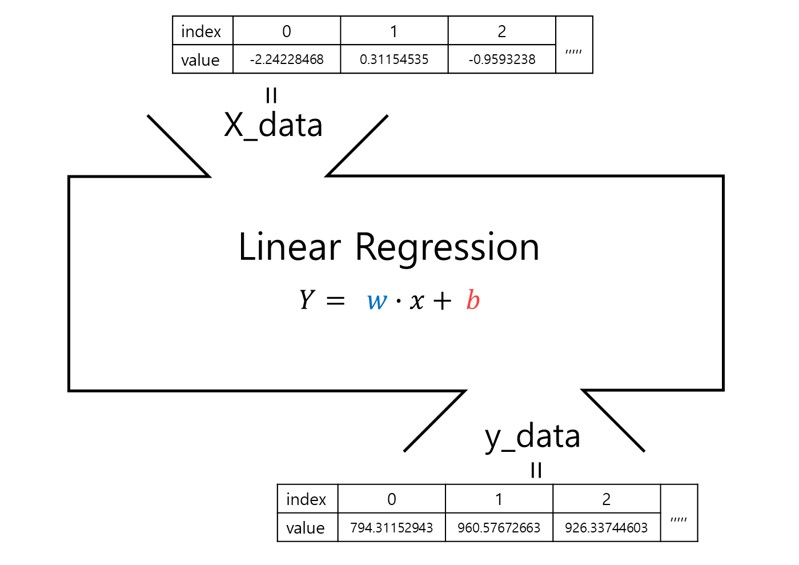

#### 1-2. 선형 모델 생성

`train_test_split(data, data2, test_size, train_size, shuffle, random_state)`
* Scikit-Learn의 model_selection패키지는 **데이터를 학습용(train)과 검증용(test)으로 분리시켜주는 명령어 train_test_split()**을 제공한다.


주요 parameter:
 
  - `data`: 독립변수(X) 데이터  
  - `data2`: 종속변수(y) 데이터 --> data 인수에 종속변수(y)가 포함되어 있다면 생략 가능 
  - `test_size`: 검증용 데이터의 개수/비율 --> 1 이하의 실수일 경우 비율을 나타냄 (기본값 = 0.25)  
  - `train_size` : 학습용 데이터의 개수/비율 --> 1 이하의 실수일 경우 비율을 나타냄 (기본값 = 0.25), test_size와 train_size 중 하나만 사용 가능  
  - `shuffle`: 데이터 섞기 (기본값은 True)  
  - `random_state`: 난수 생성

참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test%20split#sklearn.model_selection.train_test_split 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 생성한 가상의 데이터를 학습용 데이터(train data)와 검증용 데이터(test data)로 나누어 보자.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, shuffle = True)

train_test_split후 data는 이러한 방식으로 분할이 된다.

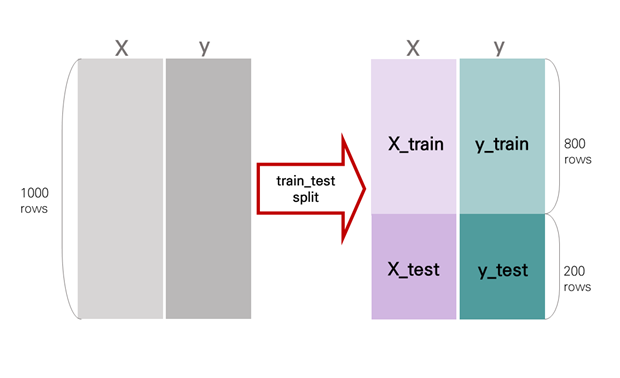

`LinearRegression(fit_intercept, normalize, copy_X, n_jobs)`
- Scikit-Learn의 linear_model 패키지에서 선형회귀(LinearRegression) 모델을 import할 수 있다.

주요 parameter:
* `fit_intercept`: y 절편(bias) 계산 여부, (기본 값 = True)
* `normalize`: 데이터 셋 정규화, (기본 값 = False)


참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20model#sklearn.linear_model.LinearRegression


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression을 hypothesis라는 변수에 대입해 보자.
hypothesis = LinearRegression()

# 굳이 별도의 변수에 넣어주지 않고 LinearRegression()으로 사용해도 무방하다. 다만, 여기서는 설명을 위해 변수에 대입하였다.

#### 1-3. 모델 학습

In [ ]:
# fit() 명령어를 통해 학습 데이터를 학습시킨 모델을 model_linear라는 변수에 대입해보자.
model_linear = hypothesis.fit(X_train, y_train)

# fit 동작 원리 : w <- w - @*Gradient
# 결과 : weight

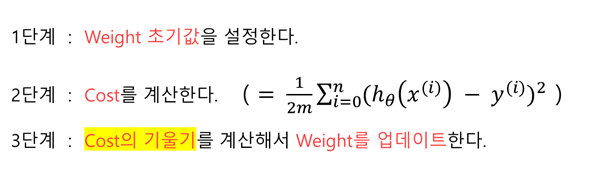

#### 1-4. 모델의 weight(가중치, 계수)와 bias 출력

.coef_
 * coef_ 속성은 각 입력 특성(feature)에 하나씩 대응되는 weight의 Numpy 배열이다.

In [ ]:
# coef_ 명령어를 통해 model_linear의 계수(=weight)을 살펴보자.
model_linear.coef_

# 앞서 생성한 데이터에는 입력 특성(feature)이 하나이므로 이에 대응하는 계수 하나만 출력된다.

array([73.9099337])

.intercept_
* intercept_ 는 모델의 bias(y 절편)값을 나타낸다.

In [ ]:
# intercept_ 명령어를 통해 model_linear의 y 절편(=bias)를 살펴보자.
model_linear.intercept_

# intercept_ 속성은 항상 실수 값 한 개이다.

999.957259021437

regplot(x, y, data)
* seaborn 라이브러리의 repplot()은 X, Y 축 값의 산점도와 선형 회귀 직선을 함께 시각화를 해준다.

주요 parameters:
* `x`: X data/ dataframe의 features 칼럼
* `y`: y data/ dataframe의 target 칼럼
* `data`: 칼럼이 속한 데이터프레임

참고: https://seaborn.pydata.org/generated/seaborn.regplot.html

In [ ]:
import seaborn as sns

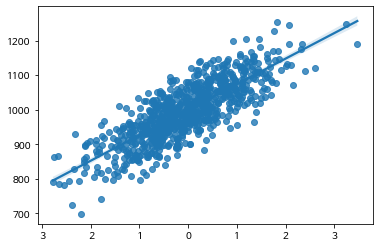

In [ ]:
# Train set data의 scatter plot(산점도)과 hypothesis(선형회귀 직선)를 함께 시각화해보자.
sns.regplot(X_train, y_train);

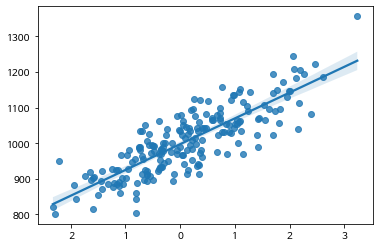

In [ ]:
#Test set data의 scatter plot(산점도)와 hypothesis(선형회귀 직선)를 함께 시각화해보자.
sns.regplot(X_test, y_test);

#### 1-5. 모델 검증

score()
*  score() 명령어를 통해 모델 성능을 검증할 수 있다.
*  R2 score 값을 반환해준다. (R2 score = 결정계수; 회귀모델의 설명력을 나타내며 최고값이 1임)


In [ ]:
# 앞서 학습시킨 model_linear의 성능을 살펴보자.
print("학습 데이터 점수 : {:.2f}".format(model_linear.score(X_train, y_train)))
print("검증 데이터 점수 : {:.2f}".format(model_linear.score(X_test, y_test)))

학습 데이터 점수 : 0.65
검증 데이터 점수 : 0.70


mean_squared_error
* MSE는 실제 값과 예측 값의 차이를 제곱하여 평균을 낸 것이다.
* Scikit-Learn의 metrics패키지는 회귀평가지표인 평균제곱오차(mean squared error)를 계산하는 명령어를 제공한다.
 
 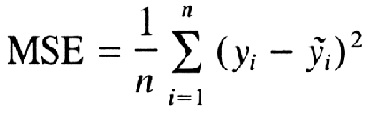
 


root mean squared error
* MSE에서 오류가 제곱이 되어 실제 오류보다 과장되기 때문에 이에 루트를 씌운 것이 RMSE이다.
* Scikit-Learn에서 따로 RMSE 계산을 위한 명령어를 제공하고 있지 않다. MSE에 루트를 씌워 직접 구하여야 한다. 

 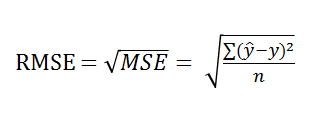

r2_score
* R2 는 분산 분의 오차로 계산할 수 있으며, 1에 가까울 수록 예측 정확도가 높음을 나타낸다.
* Scikit-Learn의 metrics패키는 회귀평가지표인 결정계수(R2 score)를 계산하는 명령어를 제공한다.
 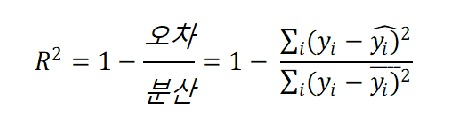

In [ ]:
# predcit() 명령어를 사용하여 y값을 예측한다.
y_predict = model_linear.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# 실제 값(y_test)과 예측값(y_predict)을 이용하여 mean squared error을 측정해보자.
mse = mean_squared_error(y_test, y_predict)

In [ ]:
# root mean squared error를 측정해보자.
import numpy as np
rmse = np.sqrt(mse)

# 사이킷런에서 RMSE를 계산하는 명령어를 제공하고 있지 않기 때문에 MSE에 루트를 씌워 직접 계산하여야 한다.
# sqrt는 루트를 씌워주는 명령어이다.

In [ ]:
# mean squared error와 이에 루트를 씌운 root mean squared error을 각각 출력해보자.
print('MSE : {:.3f}, RMSE : {:.3f}'.format(mse, rmse))

MSE : 2610.215, RMSE : 51.090


In [ ]:
from sklearn.metrics import r2_score

# 실제 값(y_test)과 예측값(y_predict)을 이용하여 R2 score을 측정하고 출력해보자.
print('R2 : {:.2f}'.format(r2_score(y_test, y_predict)))

#model_linear.score(X_test, y_test)와 동일한 값이 나온 것을 확인할 수 있다.

R2 : 0.70


#### 1-6. 다중 회귀 (Linear Regression with Multi-Variable)

* 앞에서는 1개의 특성(feature)을 가진 데이터 셋으로 선형회귀를 해보았다. 지금부터는 여러 개(ex. 100개)의 특성을 가진 데이터 셋으로 션형회귀를 해보자.

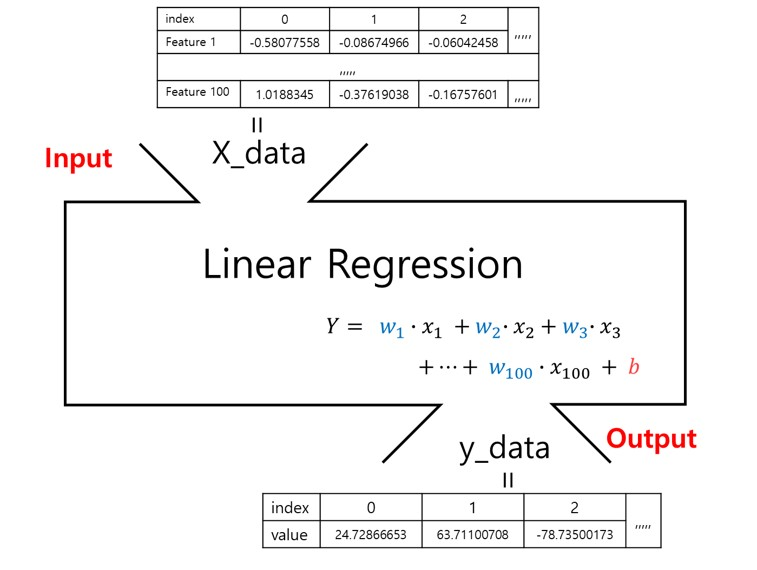

In [ ]:
# 100개 features를 가진 가상의 데이터 생성(y 절편=10, noise의 표준편차 = 50)
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 100, bias = 10, noise = 50, random_state = 77)

# 단일 특성 데이터 셋 생성에 사용했던 명령어(make_regression)를 동일하게 사용하되, n_features 값을 조절하면 다중 특성 데이터 셋 생성이 가능하다.

In [ ]:
# X와 y의 첫 번째 샘플을 출력해보자.
print('input data : \n{}, \n\n output data : \n{}'.format(X_multi[:1], y_multi[:1]))

#1개의 input data에는 100개의 각각 다른 값들이 들어있다. 그 이유는 n_features = 100, 즉 100개의 특성을 가지고 있는 데이터이기 때문이다.

input data : 
[[-0.58077558  0.2122197  -1.08502115 -0.65671865 -0.52911235 -0.34222829
   0.4510546  -0.5688668   0.03930459  1.79860093 -0.31626413  0.48170264
  -0.82560832  0.43731028  0.34779923 -0.45401009 -0.01016883  1.61143963
  -0.43953959 -1.07978809 -1.36647442  0.18048418  0.05583949  0.26047461
  -0.18321282 -0.98316403  0.06354479 -1.56647457 -0.20259937  1.17308551
   0.10507999  0.82842192  1.08423051 -0.52215594  0.86919798 -0.53893822
   1.78681786 -0.5835063  -0.53843661 -0.48729685  0.2245669  -1.47294436
   1.31406625 -0.12645065  1.33537074 -0.04175867  0.37466229 -0.64543199
  -0.71861351 -0.31743451  0.89861124  2.38144015  1.35559749 -0.27158567
  -1.44412929  0.2985498   0.43936142 -0.5484629   0.55750884  0.84468442
   1.76421931  0.08391279  0.49925267 -0.23512313  0.12754932 -0.08134717
   1.78543296 -0.79181172 -1.08906065  0.25648527  0.65580386  0.56442287
   0.82513931 -2.14310973  1.24405121  0.03750384 -1.80137106  0.39825839
  -0.70757417 -1.7223570

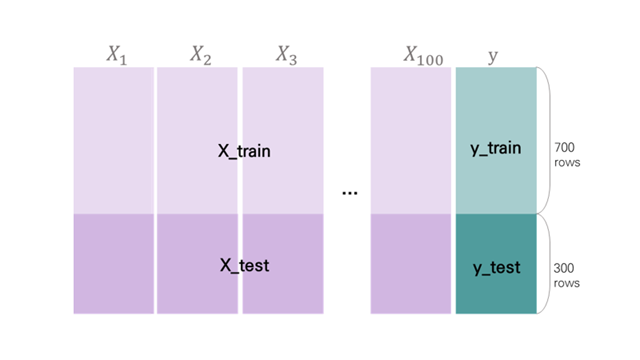

In [ ]:
# 생성한 가상의 데이터를 학습용과 검증용으로 7:3의 비율로 나누어보자.
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)

In [ ]:
# 선형회귀 모델을 hypothesis_multi 모델에 담아보자.
hypothesis_multi = LinearRegression()

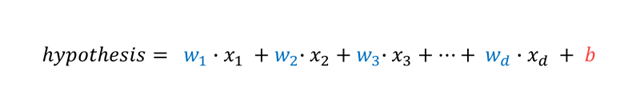

In [ ]:
# 모델을 학습시켜보자.
model_linear_multi = hypothesis_multi.fit(X_train, y_train)

In [ ]:
# 학습된 모델의 weight와 bias를 각각 출력시켜보자.
print('weight : \n{}\n\n'.format(model_linear_multi.coef_))
print('bias : \n{}'.format(model_linear_multi.intercept_))

weight : 
[-6.88379297e-01  4.27530471e-01 -4.54997483e+00 -5.02687064e+00
 -3.10050466e+00  3.92146408e-01  3.96514637e+00 -5.96918944e-01
 -9.17490200e-01 -1.10630611e+00 -5.24432293e-01  5.99795893e+01
  1.22199469e+00  4.81260010e-01 -1.26205348e+00 -2.54920924e+00
  3.01842835e-01  3.17970439e-01  1.02222180e+00  1.91788651e+00
 -8.02228210e-01  8.35883728e+00  1.27964809e+00 -2.59744658e+00
  1.82080461e-01  9.15916321e-01  1.48244477e+00  4.32059149e-01
  2.89465248e+00  2.83875669e+00  4.63436871e+00 -1.14222479e+00
 -1.99737401e+00  2.04830742e+00  7.28497048e-01  3.53212973e+00
 -3.27232629e+00  1.31897422e+01  4.54683143e-01 -1.63767201e+00
  4.95251435e+01  3.15675645e-01  3.00031681e+00 -3.38764926e-01
 -7.05682472e-02  1.67081877e-01  1.80615740e+00 -2.32323821e+00
 -3.22559116e-01 -6.59512911e-02  1.49624728e+00 -1.92790609e+00
  3.66773974e+00  1.92996924e+00 -3.16269698e-01 -2.70374424e+00
 -1.94781754e+00  2.15678725e+00  5.11693695e-01  1.84409397e-01
 -2.25230469e+0

In [ ]:
# 학습된 모델의 학습 데이터에 대한 R2 값, 검증 데이터에 대한 R2 값을 각각 출력해보자.
print('학습 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_linear_multi.score(X_test, y_test)))

학습 데이터 점수 : 0.94
검증 데이터 점수 : 0.91


#### 1-7. noise값 조절

In [ ]:
#noise ==0으로 생성한 데이터를 X_0, y_0 변수에 새로 저장 
X_0, y_0 = make_regression(n_samples = 1000, n_features = 1, bias = 10, noise = 0, random_state = 77)

#noise == 30으로 생성한 데이터를 X_30, y_30 변수에 새로 저장 
X_30,y_30 = make_regression(n_samples = 1000, n_features = 1, bias = 10, noise = 30, random_state = 77)

#noise ==300으로 생성한 데이터를 X_300, y_300 변수에 새로 저장
X_300,y_300 = make_regression(n_samples = 1000, n_features = 1, bias = 10, noise = 300, random_state = 77)

Text(0.5, 1.0, 'noise = 300')

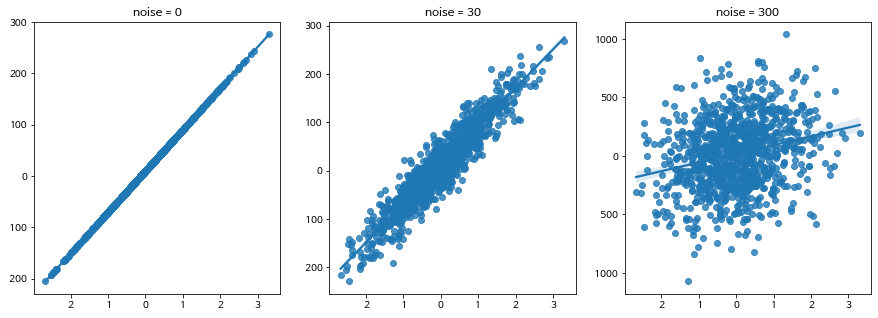

In [ ]:
#3개의 열을 가진 subplots 생성
from matplotlib import pyplot as plt
fig, axs = plt.subplots(figsize=(15,5), ncols=3)

#seabron의 regplot(scatter plot + linear regression 직선 함께 표현)을 사용하여 생성된 subplots에 그래프 그리기
ex1 = sns.regplot(x=X_0, y=y_0, ax=axs[0])
ex1.set_title('noise = 0')

ex2 = sns.regplot(x=X_30, y=y_30, ax=axs[1])
ex2.set_title('noise = 30')

ex3 = sns.regplot(x=X_300, y=y_300, ax=axs[2])
ex3.set_title('noise = 300')

In [ ]:
#noise 값에 따른 weight, bias, r2 score 변화 확인하기
for noise in [[X_0, y_0],[X_30, y_30],[X_300, y_300]]:
    X_train, X_test, y_train, y_test = train_test_split(noise[0], noise[1], test_size = 0.2, 
                                                    shuffle = True)
    hypothesis = LinearRegression()
    model_linear_noise = hypothesis.fit(X_train, y_train)
    
    print('weight : {}'.format(model_linear_noise.coef_))
    print('bias : {}'.format(model_linear_noise.intercept_))
    print('학습 데이터 점수 : {:.2f}'.format(model_linear_noise.score(X_train, y_train)))
    print('검증 데이터 점수 : {:.2f}\n\n'.format(model_linear_noise.score(X_test, y_test)))

weight : [80.44927228]
bias : 10.000000000000002
학습 데이터 점수 : 1.00
검증 데이터 점수 : 1.00


weight : [79.26177246]
bias : 10.565920149012388
학습 데이터 점수 : 0.88
검증 데이터 점수 : 0.88


weight : [77.43319468]
bias : 21.190363434893683
학습 데이터 점수 : 0.07
검증 데이터 점수 : 0.04




### 2) 보스턴 주택데이터로 예측하기

#### 2-1. 보스턴 주택 데이터 생성

보스턴 주택 데이터는 사이킷런에 내장된 데이터 셋이다.

feature:

* `CRIM`: 지역별 범죄 발생률
* `ZN`: 25,000 평방피트를 초과하는 거주 지역의 비율
* `INDUS`: 비상업 지역 넓이 비율
* `CHAS`: 찰스강에 대한 더미 변수 (강의 경계에 위치할 시 1, 아닐 시 2)
* `NOX`: 일산화질소 농도
* `RM`: 거주할 수 있는 방 개수
* `AGE`: 1940년 이전에 건축된 소유 주택의 비율
* `DIS`: 5개 주요 고용센터까지의 가중 거리
* `RAD`: 고속도로 접근 용이도
* `TAX`: 10,000달러당 재산세율
* `PTRATIO`: 지역의 교사와 학생 수 비율
* `B`: 지역의 흑인 거주 비율
* `LSTAT`: 하위 계층의 비율
* `MEDV`: 본인 소유의 주택 가격(중앙값)

<a title="Andrew Jameson at English Wikipedia, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Street_scape_in_Boston-Edison.jpg"><img width="512" alt="Street scape in Boston-Edison" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Street_scape_in_Boston-Edison.jpg/512px-Street_scape_in_Boston-Edison.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Street_scape_in_Boston-Edison.jpg">Andrew Jameson at English Wikipedia</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons

다중회귀분석을 사용하여 데이터셋의 13가지 features로 보스턴 주택의 가격을 예측해보자 -> Linear Regression with Multi-Variable

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
# load_boston() 명령어로 boston data set을 로드해 boston 변수에 담아보자.
boston = load_boston()
# boston 전체 data set을 살펴보자.
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

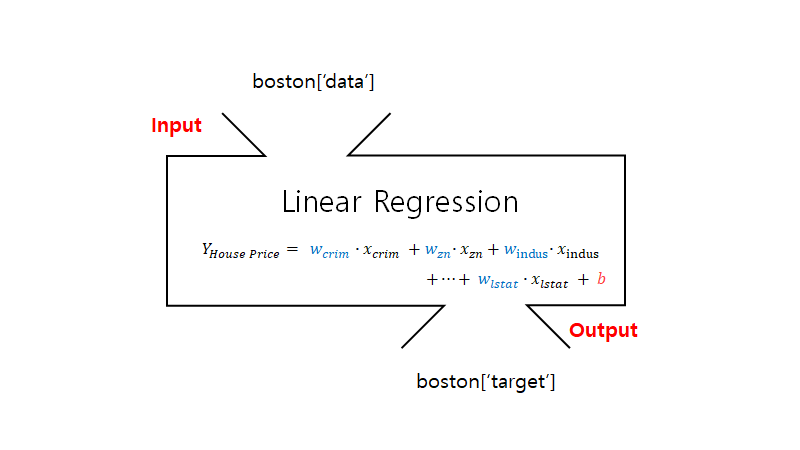

In [ ]:
# feature 값(X값)을 살펴보자.
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
# target값(y값)을 살펴보자.
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
# featue명을 살펴보자.
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# X data와 y data의 크기를 각각 출력해보자.
print('data의 크기:', boston['data'].shape)
print('target의 크기:', boston['target'].shape)

data의 크기: (506, 13)
target의 크기: (506,)


In [ ]:
# 데이터프레임으로 변환시켜 보자
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# target 배열(array)를 boston_df에 추가해보자.
boston_df['PRICE'] = boston.target

# boston_df의 처음 케이스 3개만 출력해보자.
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
# 학습용(train) 그리고 테스트용(test)으로 8:2의 비율로 데이터 세트를 분리해보자.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston['data'], boston['target'],
                                                    test_size=0.2,
                                                    shuffle=True)

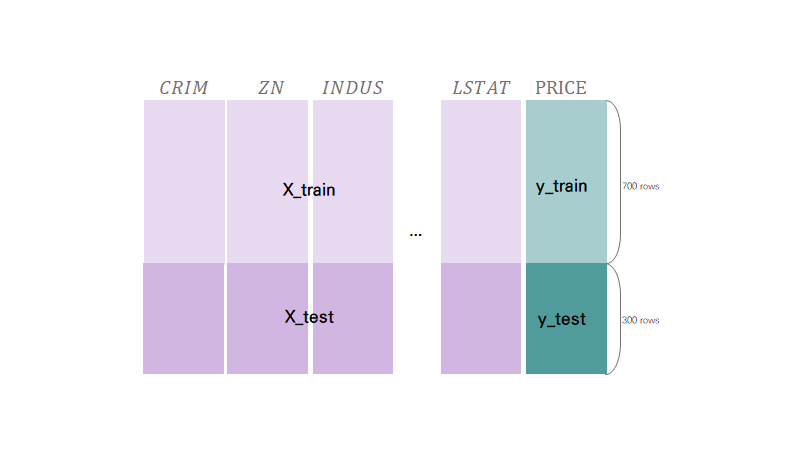

#### 2-2. 선형 모델 학습 및 검증

In [ ]:
from sklearn.linear_model import LinearRegression

#LinearRegression 클래스를 이용해 linear regression 모델을 만들어 hypothesis라는 변수에 할당시켜보자.
hypothesis = LinearRegression()

# 학습 데이터로 생성된 linear regression 모델을 학습시켜보자.
model_boston = hypothesis.fit(X_train, y_train)

# 학습된 모델의 weight와 bias를 각각 출력해보자.
print('learning finished..')
print('coef_: {}'.format(model_boston.coef_))
print()
print('bias: {}'.format(model_boston.intercept_))

learning finished..
coef_: [-8.30314922e-02  4.14378968e-02  1.39293293e-02  4.12516005e+00
 -2.11261325e+01  3.37214445e+00  2.03104003e-02 -1.30599581e+00
  3.62336551e-01 -1.16572141e-02 -9.24394471e-01  8.74146561e-03
 -6.43224390e-01]

bias: 39.424792981137315


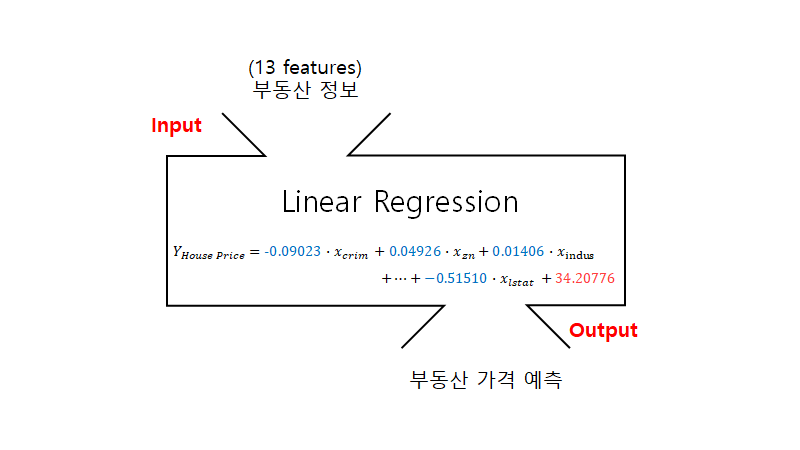

In [ ]:
#학습된 모델의 X_train, X_test 각각 데이터에 대한 예측 성능 score을 출력해보자.
print('학습 데이터 점수:', model_boston.score(X_train, y_train), '\n검증 데이터 점수:', model_boston.score(X_test, y_test))

score on train data: 0.748481135394955 
score on test data: 0.6979777277900152


In [ ]:
#학습된 모델의 테스트 데이터에 대한 예측 값을 확인해보자.
model_boston.predict(X_test)

array([12.6662636 , 30.40072813,  6.62376637, 34.92409591, 29.12111687,
        7.25356483,  7.50697313, 36.77900189, 18.86632001, 24.57497132,
       23.67987839, 26.25770489, 27.96735432, 17.03313034,  1.60440503,
       19.85998342, 19.05528199,  8.46249994, 33.68019125,  4.58001392,
       43.8575818 ,  5.62097323, 16.72986037, -0.21864018, 25.18640465,
       21.83963813, 24.08541103, -1.39135932, 33.87260879, 15.53598412,
       21.33911581, 24.35570185, 32.98015846, 12.82288246, 21.92407074,
       34.08470619, 20.55459376, 29.06416341, 21.13232834, 21.74541154,
       14.8428137 , 31.70166695, 21.70340043, 11.88120901, 34.66114745,
       22.1313446 , 26.08090722, 24.90642213, 20.50120978, 28.87322349,
       20.6469598 , 17.90674156, 38.75264561, 33.46489352, 20.12605234,
       24.70875571, 19.16901292, 32.63594041, 34.7771168 , 13.62511794,
       20.21332201, 19.26566409, 12.8625525 , 23.45566362, 20.46183656,
       10.65649356, 15.66658665, 19.61628642, 23.8962562 , 22.42

### 3) 심화 학습 (pseudocode)

    class LinearRegresson():
    
    학습과정
    def fit(X_data, y_data):
        1. 랜덤값으로 Weight 초기값 설정(feature개수 + 1 만큼) 
        2. 최적화: 경사하강법을 활용하여 Weight를 조정하는 과정을 반복하여 예측성능 향상(MSE 최소화)
            2-1. Weight와 X_data를 곱하여 회귀식 결과값 도출
            2-2. 실제값과 예측값의 차이를 이용하여 비용함수의 기울기를 구한다.
            2-5. Weight에서 (학습률*기울기)를 뺀 값을 새로운 Weight로 적용한다.
        3. 최종 Weight값이 적용된 모델을 return

    예측 과정
    def predict(X_data):
        1. 학습된 Weight값과 입력받은 데이터를 곱하여 예측값을 도출
        2. 예측값을 return

    평가 과정
    def score(X_data, y_data):
        1. 입력받은 데이터에 대해 predict() 함수를 통해 예측 결과를 받는다.
        2. 오류(= (회귀식을 통해 얻은 예측값과 실제값의 차이)^2의 평균)를 구한다.
        3. 분산(= (회귀식을 통해 얻은 예측값과 실제값 평균의 차이)^2의 평균)을 구한다.
        4. R2 score(= 1 - (오류 / 분산))을 구한다.
        5. R2 score을 return

In [ ]:
class LinearRegresson():
    def __init__(self, learning_rate=0.01, max_iter=100, **kwargs):
        """
        [hyper_parameter]
        learning_rage: 학습률
        max_iter: 반복 최대치
        kwargs: 재사용을 위해 선언만.
        """
        self._learning_rate = learning_rate
        self.max_iter = max_iter
        self.W_ = None

    # 학습 과정   
    def fit(self, X_data, y_data):
        
        # 1. 랜덤값으로 Weight 초기값 설정(feature개수 + 1 만큼)
        self.weight_list_ = []
        self.gradient_list_ = []
        # X [[1], [2], [3], ...] 

        num_sample, num_col = np.shape(X_data)
        # Beta(Theta) 추가
        # H(x) = W1*X + W0
        # H(X) = W1*X + 1*W0
        self.W_ = np.random.random(size=(num_col+1)) #Beta_n,... Beta1, Beta0
        X_data = np.c_[X_data, np.ones(num_sample)]
        X_data_T = X_data.T

        # 2. 경사하강법을 활용하여 예측성능을 높이는 과정을 반복
        for i in range(self.max_iter):
            # 실제값과 예측값의 차이 (err)
            err = np.dot(X_data, self.W_) - y_data

            # err 이용하여 cost(=MSE) 생성 : 오차의 제곱합 / 2 * 데이터 개수 = cost
            cost = np.sum(err ** 2) / (2 * num_sample)

            #  새로운 w = w - learning_rate*()
            gradient = np.dot(X_data_T, err) / num_sample

            # Weight 업데이트
            self.W_ = self.W_ - (self._learning_rate * gradient)

            
            self.gradient_list_.append(gradient)
            self.weight_list_.append(self.W_)
        
         # 3. 최종 Weight값이 적용된 모델을 return
        return self

    #예측 과정   
    def predict(self, X_data):
        num_sample, num_col = np.shape(X_data)
        X_data = np.c_[X_data, np.ones(num_sample)]
        # 학습된 Weight값과 입력받은 데이터를 곱하여 예측값을 return
        return np.dot(X_data, self.W_)

    #평가 과정
    def score(self, X_data, y_data):
        
        # 1. 입력받은 데이터에 대해 predict() 함수를 통해 예측 결과를 받는다.
        # 2. 오류(= (회귀식을 통해 얻은 예측값과 실제값의 차이)^2의 평균)를 구한다.
        err = np.mean(np.square(y_data - self.predict(X_data)))
        # 3. 분산(= (회귀식을 통해 얻은 예측값과 실제값 평균의 차이)^2의 평균)을 구한다.
        var = np.mean(np.square(y_data - np.mean(y_data)))

        # 4. R2 score(= 1 - (오류 / 분산))을 return한다. 
        return 1 - (err/var)